In [50]:
from resources.CSI_functions import CSI_functions as CSI
import pandas as pd

In [51]:
## Example 1 - Generating CSI using the CSI module (this is what I used and saved the resulting dataframe to a CSV)

start_date = '20170901'
end_date = '20201103'

df_csi = CSI(start_date, end_date, qqe_period = 32, qqe_sf = 10, qqe_factor = 2, use_yahoo_data = True).calc_csi(include_quadrant_id = True)

In [64]:
## Example 2 - Reading the CSV file that I had just saved...

df_csi = pd.read_csv('csi_example.csv')
df_csi['date'] = [pd.to_datetime(x) for x in df_csi['date']]
df_csi.set_index('date', inplace = True)
df_csi.tail()

,csi1,csi2,quadrant
date,,,
2020-10-28,2.870814,3.631753,Q2
2020-10-29,2.636128,3.319977,Q2
2020-10-30,2.295119,2.934962,Q2
2020-11-02,2.106264,2.558900,Q2
2020-11-03,2.202284,2.483393,Q2


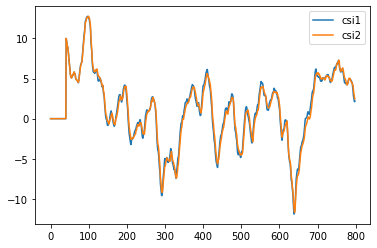

In [55]:
df_csi.plot()

In [40]:
quadrant = [int(x.strip('Q')) for x in df_csi['quadrant'] if type(x) == str]

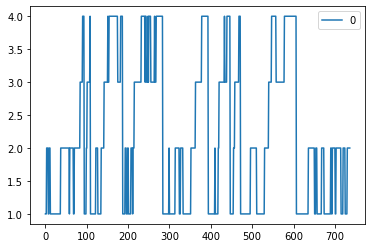

In [41]:
pd.DataFrame(quadrant).plot()

In [42]:
df_csi

,csi1,csi2,quadrant
date,,,
2017-09-01,0.000000,0.000000,0
2017-09-05,0.000000,0.000000,0
2017-09-06,0.000000,0.000000,0
2017-09-07,0.000000,0.000000,0
2017-09-08,0.000000,0.000000,0
...,...,...,...
2020-10-28,2.870814,3.631753,Q2
2020-10-29,2.636128,3.319977,Q2
2020-10-30,2.295119,2.934962,Q2


In [43]:
df_csi.loc[df_csi.loc[df_csi['quadrant'] == 'Q1'].index, 'Q1_BOOL'] = True # Long Trades
df_csi.loc[df_csi.loc[df_csi['quadrant'] == 'Q2'].index, 'Q2_BOOL'] = True # Long Trades
df_csi.loc[df_csi.loc[df_csi['quadrant'] == 'Q3'].index, 'Q3_BOOL'] = True # Long Trades
df_csi.loc[df_csi.loc[df_csi['quadrant'] == 'Q4'].index, 'Q4_BOOL'] = True # Long Trades

In [44]:
df_csi['Q1_COUNT'] = df_csi['Q1_BOOL'] * (df_csi['Q1_BOOL'].groupby((df_csi['Q1_BOOL'] != df_csi['Q1_BOOL'].shift()).cumsum()).cumcount() + 1)
df_csi['Q2_COUNT'] = df_csi['Q2_BOOL'] * (df_csi['Q2_BOOL'].groupby((df_csi['Q2_BOOL'] != df_csi['Q2_BOOL'].shift()).cumsum()).cumcount() + 1)
df_csi['Q3_COUNT'] = df_csi['Q3_BOOL'] * (df_csi['Q3_BOOL'].groupby((df_csi['Q3_BOOL'] != df_csi['Q3_BOOL'].shift()).cumsum()).cumcount() + 1)
df_csi['Q4_COUNT'] = df_csi['Q4_BOOL'] * (df_csi['Q4_BOOL'].groupby((df_csi['Q4_BOOL'] != df_csi['Q4_BOOL'].shift()).cumsum()).cumcount() + 1)


In [45]:
columns = ['Q1_COUNT', 'Q2_COUNT', 'Q3_COUNT', 'Q4_COUNT']

In [46]:
(df_csi[columns[0]] == 1).sum()
    

29

In [47]:
total_quadrant_changes = 0

for col in columns:
    total_quadrant_changes += (df_csi[columns[0]] == 1).sum()
    

In [48]:
total_quadrant_changes

116

In [49]:
## Total Quadrant 3 occurrences over the time period 

(df_csi['Q3_COUNT'] == 1).sum()

17

In [1]:
import datetime

In [4]:
t = datetime.date.today()

t - datetime.timedelta(days=10)

datetime.date(2020, 12, 31)